In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#Corner Detection Using Harris Corner Detection

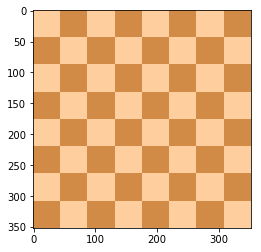

In [2]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

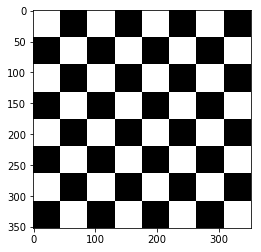

In [4]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap = 'gray')

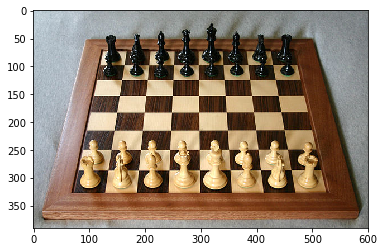

In [5]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

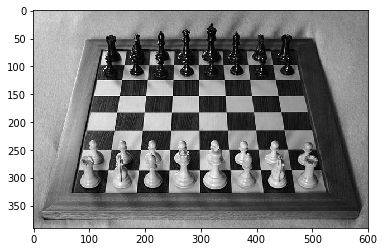

In [6]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [7]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_flat_chess)

In [8]:
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [10]:
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)

In [11]:
dst = cv2.dilate(dst, None)

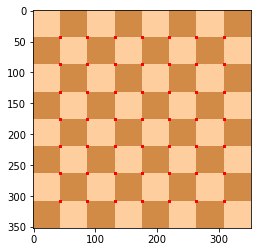

In [12]:
flat_chess[dst>0.01 * dst.max()] = [255,0,0]
plt.imshow(flat_chess)

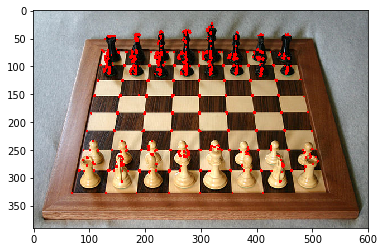

In [13]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_real_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(real_chess)

Shi Tomasi Corner Detection

In [26]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

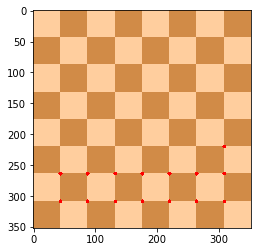

In [27]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,15,0.01,10)
corners = np.int0(corners)

#Draw Circles where the corner is found.
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

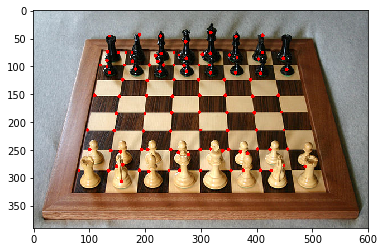

In [28]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,105,0.01,10)
corners = np.int0(corners)

#Draw Circles where the corner is found.
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)